The packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.frequent_patterns import apriori, association_rules

Locate the file and read the file

In [2]:
file_path = "..\dataset\symptoSense.csv"
df = pd.read_csv(file_path)
df_apriori = df.copy()

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
C:\Users\navne\AppData\Local\Temp\ipykernel_22956\2035479048.py:1: DeprecationWarning: invalid escape sequence \d
  file_path = "..\dataset\symptoSense.csv"


In [3]:
le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

In [4]:
X = df.drop('prognosis', axis=1)
Y = df['prognosis']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train_pca shape: (5432, 15)
Y_train shape: (5432,)


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(len(np.unique(Y)), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X_train_pca, Y_train, epochs=200, batch_size=32, validation_data=[X_test_pca, Y_test])

Epoch 1/200
170/170 [==============================] - 1s 3ms/step - loss: 5.1251 - accuracy: 0.0666 - val_loss: 3.1593 - val_accuracy: 0.2261
Epoch 2/200
170/170 [==============================] - 0s 2ms/step - loss: 2.3016 - accuracy: 0.3864 - val_loss: 1.9040 - val_accuracy: 0.4624
Epoch 3/200
170/170 [==============================] - 0s 2ms/step - loss: 1.5026 - accuracy: 0.5663 - val_loss: 1.3296 - val_accuracy: 0.6068
Epoch 4/200
170/170 [==============================] - 0s 2ms/step - loss: 1.1364 - accuracy: 0.6596 - val_loss: 1.1341 - val_accuracy: 0.6554
Epoch 5/200
170/170 [==============================] - 0s 2ms/step - loss: 0.9354 - accuracy: 0.7110 - val_loss: 1.0147 - val_accuracy: 0.6907
Epoch 6/200
170/170 [==============================] - 0s 2ms/step - loss: 0.8086 - accuracy: 0.7408 - val_loss: 0.9510 - val_accuracy: 0.7113
Epoch 7/200
170/170 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.7680 - val_loss: 0.8463 - val_accuracy: 0.7224

In [11]:
loss, accuracy = model.evaluate(X_test_pca, Y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

43/43 [==============================] - 0s 3ms/step - loss: 1.1785 - accuracy: 0.8218
Test Accuracy: 82.18%


In [12]:
y_pred = model.predict(X_test_pca)
y_pred_classes = y_pred.argmax(axis=1)

43/43 [==============================] - 0s 2ms/step


In [13]:
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [14]:
class_report = classification_report(Y_test, y_pred_classes, labels=np.unique(Y_test), target_names=[str(i) for i in np.unique(Y_test)])
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       0.67      0.67      0.67         3
           3       1.00      0.75      0.86         4
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         1
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4
          18       0.00      0.00      0.00         1
   

c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
y_pred_labels = le.inverse_transform(y_pred_classes)

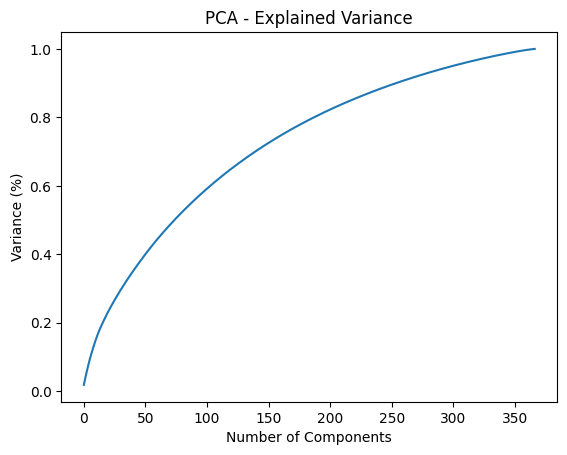

In [16]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('PCA - Explained Variance')
plt.show()

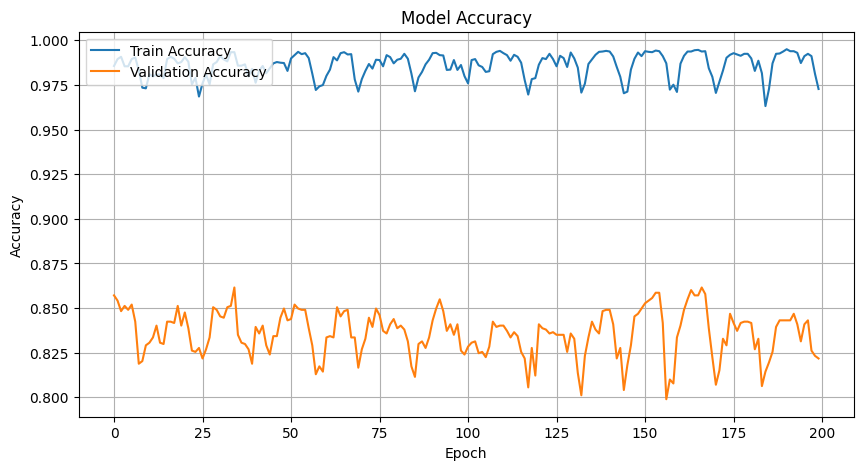

In [17]:
# Plotting Accuracy and Loss Curves
history = model.fit(X_train_pca, Y_train, epochs=200, batch_size=32, validation_data=[X_test_pca, Y_test], verbose=0)

# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

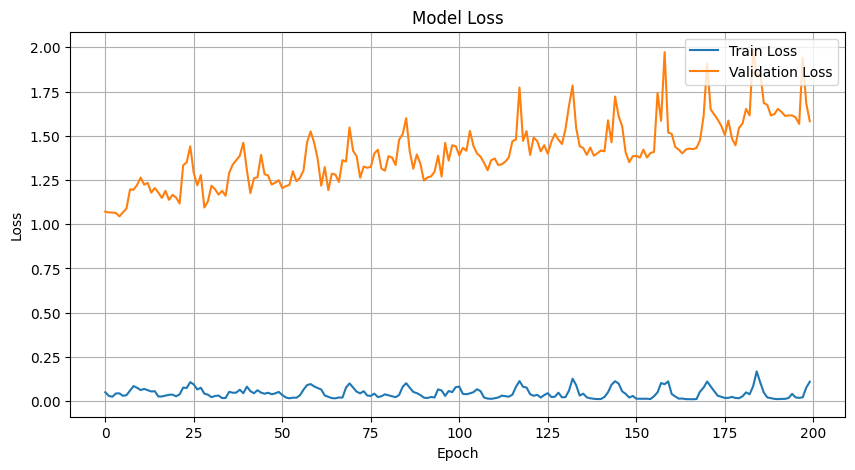

In [18]:
# Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()

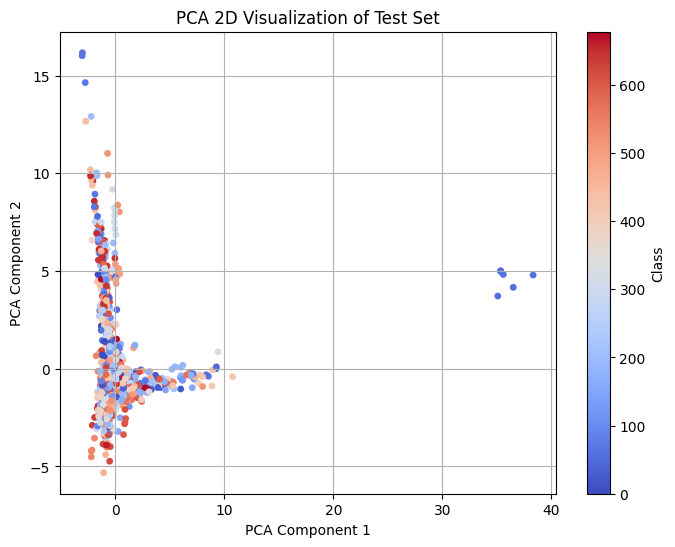

In [19]:
# PCA Visualization
# Visualizing first two PCA components of the test set
pca_2d = PCA(n_components=2)
X_test_pca_2d = pca_2d.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=Y_test, cmap='coolwarm', s=15)
plt.title('PCA 2D Visualization of Test Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label="Class")
plt.grid()
plt.show()

In [ ]:
# Convert the dataset into binary (1 for present symptom, 0 for absent symptom)
print(df_apriori)
df_apriori = df_apriori.drop('prognosis', axis=1)  # Exclude 'prognosis' for Apriori
df_apriori_binary = df_apriori.apply(lambda x: x > 0).astype(int)  # Convert to binary values (1 if feature > 0)



                         prognosis  abdominal distention  \
0        Anemia of chronic disease                     0   
1        Anemia of chronic disease                     0   
2        Anemia of chronic disease                     0   
3        Anemia of chronic disease                     0   
4        Anemia of chronic disease                     0   
...                            ...                   ...   
6785  Rocky Mountain spotted fever                     0   
6786  Rocky Mountain spotted fever                     0   
6787  Rocky Mountain spotted fever                     0   
6788  Rocky Mountain spotted fever                     0   
6789  Rocky Mountain spotted fever                     0   

      abnormal appearing skin  abnormal appearing tongue  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0          

c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
frequent_itemsets = apriori(df_apriori_binary, min_support=0.05, use_colnames=True)  # Reduced to 0.05
if frequent_itemsets.empty:
    print("No frequent itemsets were found. Try lowering the support threshold.")
else:
    print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)  # Reduced to 0.4
    if rules.empty:
        print("No association rules were found. Try lowering the confidence threshold.")
    else:
        rules_output = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
        rules_output['antecedents'] = rules_output['antecedents'].apply(lambda x: ', '.join(list(x)))
        rules_output['consequents'] = rules_output['consequents'].apply(lambda x: ', '.join(list(x)))

        # Print rules in 'nA -> nB' format
        for index, row in rules_output.iterrows():
            print(f"{row['antecedents']} -> {row['consequents']}")

Number of frequent itemsets found: 46
feet turned in -> coryza
coryza -> feet turned in
seizures -> nasal congestion
nasal congestion -> seizures
nasal congestion -> vaginal redness
vaginal redness -> nasal congestion
seizures -> vaginal redness
vaginal redness -> seizures


c:\Users\navne\My_Files\Navneeth_Codes\symptosense\env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\navne\AppData\Local\Temp\ipykernel_22956\1269449637.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_output['antecedents'] = rules_output['antecedents'].apply(lambda x: ', '.join(list(x)))
C:\Users\navne\AppData\Local\Temp\ipykernel_22956\1269449637.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat